In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import webbrowser

In [3]:
IMAGE_SIZE = 150
BATCH_SIZE = 32
EPOCHS = 7
CHANNELS = 3

In [4]:
train_path ="/content/drive/MyDrive/Vegetable Images/train"
test_path ="/content/drive/MyDrive/Vegetable Images/test"
val_path ="/content/drive/MyDrive/Vegetable Images/validation"

In [5]:
# 1. Train Set
train_ds = ImageDataGenerator(rescale = 1.0/255.0)
train_image_generator = train_ds.flow_from_directory(
                                            train_path,
                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical')

# 2. Validation Set
val_ds = ImageDataGenerator(rescale = 1.0/255.0)
val_image_generator = train_ds.flow_from_directory(
                                            val_path,
                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical')

# 3. Test Set
test_ds = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_ds.flow_from_directory(
                                            test_path,
                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical')

Found 10030 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [6]:
class_names = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_names)

{0: 'Brokoli', 1: 'Domates', 2: 'Fasulye', 3: 'Havuç', 4: 'Kabak', 5: 'Karnabahar', 6: 'Lahana', 7: 'Patates', 8: 'Salatalık', 9: 'Sukabağı'}


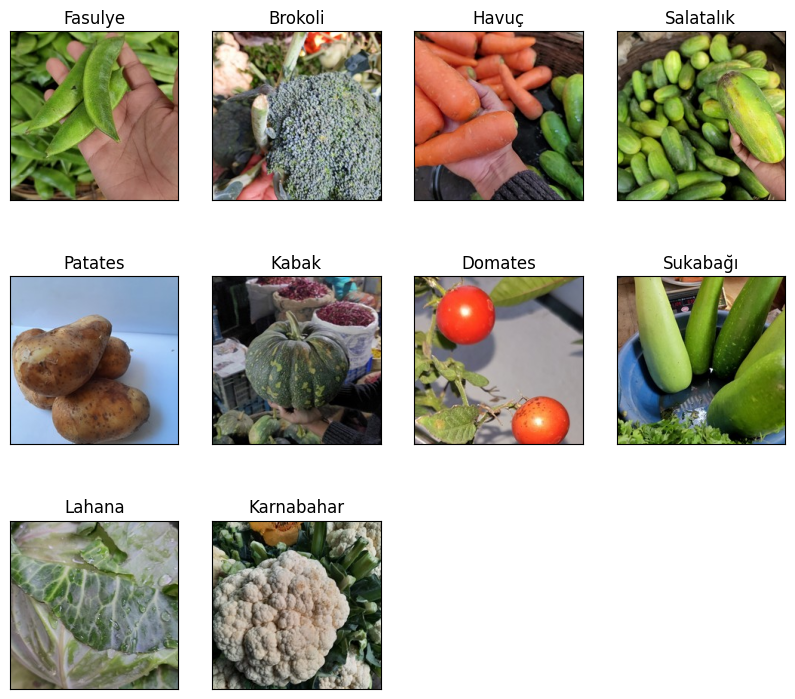

In [8]:
import random

plt.figure(figsize=(10,9))
for i, folder in enumerate(os.listdir(train_path)):
    file_paths = [os.path.join(train_path, folder, file)
      for file in os.listdir(os.path.join(train_path, folder))
      if file.endswith(('.jpg', '.png', '.jpeg'))]

    if file_paths:
        img_path = random.choice(file_paths)
        img = tf.keras.utils.load_img(img_path)

    if file_paths:
        img_path = random.choice(file_paths)
        img = tf.keras.utils.load_img(img_path)

        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(folder)

plt.show()

In [9]:
n_classes=10
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,728,458 (10.41 MB)

 Trainable params: 2,728,458 (10.41 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
history = model.fit(train_image_generator,
                 epochs=EPOCHS,
                 verbose=1,
                 validation_data=val_image_generator)

Epoch 1/7


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


314/314 ━━━━━━━━━━━━━━━━━━━━ 3850s 12s/step - accuracy: 0.2939 - loss: 1.8721 - val_accuracy: 0.6830 - val_loss: 0.9504
Epoch 2/7
314/314 ━━━━━━━━━━━━━━━━━━━━ 461s 1s/step - accuracy: 0.6328 - loss: 1.0320 - val_accuracy: 0.7625 - val_loss: 0.7273
Epoch 3/7
314/314 ━━━━━━━━━━━━━━━━━━━━ 473s 2s/step - accuracy: 0.7253 - loss: 0.7565 - val_accuracy: 0.7875 - val_loss: 0.6539
Epoch 4/7
314/314 ━━━━━━━━━━━━━━━━━━━━ 507s 2s/step - accuracy: 0.7916 - loss: 0.5993 - val_accuracy: 0.8940 - val_loss: 0.3808
Epoch 5/7
314/314 ━━━━━━━━━━━━━━━━━━━━ 529s 2s/step - accuracy: 0.8432 - loss: 0.4677 - val_accuracy: 0.9195 - val_loss: 0.2626
Epoch 6/7
314/314 ━━━━━━━━━━━━━━━━━━━━ 559s 2s/step - accuracy: 0.8780 - loss: 0.3788 - val_accuracy: 0.9430 - val_loss: 0.2021
Epoch 7/7
314/314 ━━━━━━━━━━━━━━━━━━━━ 518s 1s/step - accuracy: 0.8879 - loss: 0.3352 - val_accuracy: 0.9450 - val_loss: 0.1991


In [15]:
def create_link(predicted_class):
  """Tahmine göre bağlantı oluşturur."""
  links = {

      "Patates": "https://www.nefisyemektarifleri.com/ara/?s=patates",
      "Domates": "https://www.nefisyemektarifleri.com/ara/?s=domates",
      "Havuç": "https://www.nefisyemektarifleri.com/ara/?s=havu%C3%A7",
      "Dolmalık_Biber": "https://www.nefisyemektarifleri.com/ara/?s=dolmal%C4%B1k%20biber",
      "Brocoli": "https://www.nefisyemektarifleri.com/ara/?s=brokoli",
      "Kabak": "https://www.nefisyemektarifleri.com/ara/?s=kabak",
      "Salatalık": "https://www.nefisyemektarifleri.com/ara/?s=salatal%C4%B1k",
      "Su_Kabak":"https://www.nefisyemektarifleri.com/ara/?s=su+kaba%C4%9F%C4%B1",
      "Lahana":"https://www.nefisyemektarifleri.com/ara/?s=lahana",
      "Karnabahar":"https://www.nefisyemektarifleri.com/ara/?s=karnabahar",
      "Bezelye":"https://www.nefisyemektarifleri.com/ara/?s=bezelyee"
  }
  return links.get(predicted_class,None)

from tensorflow.keras.preprocessing import image

def sonuc_image(img_path):

  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array / 255.0


  prediction = model.predict(img_array)

  predicted_class_index = np.argmax(prediction)

  if 0 <= predicted_class_index < len(class_names):
    predicted_class = list(class_names.values())[predicted_class_index]
  else:
    predicted_class = "Unknown"
    print(f"Predicted class index {predicted_class_index} is out of range of known classes.")

  confidence = round(100 * (np.max(prediction)), 2)
  print('Tahmin edilen sınıf:', predicted_class)
  print('Güvenirlik:', confidence)

  create_link(predicted_class)

  link = create_link(predicted_class)

  if link:
    print(f"URL: {link}")
  else:
    print(f"{predicted_class} için URL bulunamadı.")




In [18]:
sonuc_image('/content/drive/MyDrive/Colab Notebooks/Patates.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Tahmin edilen sınıf: Patates
Güvenirlik: 99.99
URL: https://www.nefisyemektarifleri.com/ara/?s=patates


In [23]:
sonuc_image('/content/drive/MyDrive/Colab Notebooks/Karnabahar.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Tahmin edilen sınıf: Karnabahar
Güvenirlik: 97.1
URL: https://www.nefisyemektarifleri.com/ara/?s=karnabahar


In [24]:
sonuc_image('/content/drive/MyDrive/Colab Notebooks/Lahana.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Tahmin edilen sınıf: Lahana
Güvenirlik: 63.41
URL: https://www.nefisyemektarifleri.com/ara/?s=lahana


In [29]:
model.save('vegetable_model.keras')